In [1]:
import pystare
import numpy
from time import process_time
import matplotlib.pyplot as plt


In [2]:
pystare.__version__

'0.5.5a0'

In [3]:
lat = numpy.array([30, 45, 60], dtype=numpy.double)
lon = numpy.array([45, 60, 10], dtype=numpy.double)

indices = pystare.from_latlon(lat, lon, 14)
indices

array([4151504989081014894, 4161865161846704590, 3643626718498217166])

In [4]:
pystare.intersects(indices,indices)

array([1, 1, 1], dtype=int32)

In [5]:
pystare.intersects(indices,indices,1)

array([1, 1, 1], dtype=int32)

In [6]:
indices0 = pystare.from_latlon([30,45,60,72,73,74],[45,60,10,72,73,74],12)
indices1 = pystare.from_latlon([30,45,60,72,73,74],[45,60,10,72,74,73],12)

In [7]:
pystare.intersects(indices0,indices1)

array([1, 1, 1, 1, 0, 0], dtype=int32)

In [8]:
pystare.intersects(indices0,indices1,1)

array([1, 1, 1, 1, 0, 0], dtype=int32)

In [9]:
pystare.intersects(indices1,indices0)

array([1, 0, 0, 1, 1, 1], dtype=int32)

In [10]:
pystare.intersects(indices1,indices0,1)

array([1, 0, 0, 1, 1, 1], dtype=int32)

In [11]:
indices0 = pystare.from_latlon([30,45,60,72,73,74],[45,60,10,72,73,74],12)
indices1 = pystare.from_latlon([30,45,60,72,73,74],[45,60,10,72,74,73],13)

In [12]:
pystare.intersects(indices0,indices1)

array([1, 1, 1, 1, 0, 0], dtype=int32)

In [13]:
pystare.intersects(indices1,indices0,1)

array([1, 1, 1, 1, 0, 0], dtype=int32)

In [55]:
def make_indices(n_indices=100,left_level=12,right_level=14):
    indices0 = pystare.from_latlon(numpy.random.random([n_indices])*360-180,numpy.random.random([n_indices])*180-90,left_level)
    indices1 = pystare.from_latlon(numpy.random.random([n_indices])*360-180,numpy.random.random([n_indices])*180-90,left_level)

    for i in range(int(n_indices/2)):
        indices0[2*i] = indices1[2*i]
        indices1[i] = (indices1[i] & ~31) + right_level
        
    return indices0,indices1

class timing(object):
    def __init__(self,label,indices0,indices1,method):
        self.label  = label
        t0          = process_time()
        self.result = pystare.intersects(indices0,indices1,method)
        t1          = process_time()
        self.dt     = t1-t0

        
def compare_timings(n,m0,m1,left_level,right_level):

    timings = {}

    indices0,indices1 = make_indices(n,left_level,right_level)
    
    left=indices0.copy()[0:m0]; right=indices1.copy()[0:m1]
    timings['Skip list']     = timing('Skip list',left,right,0)
    
    left=indices0.copy()[0:m0]; right=indices1.copy()[0:m1]
    timings['Sort & search'] = timing('Sort & search',left,right,1)
    
    left=indices0.copy()[0:m0]; right=indices1.copy()[0:m1]
    timings['N-squared']     = timing('N-squared',left,right,-1) # The default
    
    result0 = timings['Sort & search'].result
    result1 = timings['Skip list'].result
    
    dt0 = timings['Sort & search'].dt
    dt1 = timings['Skip list'].dt
    
    delta_max = numpy.amax(numpy.abs(result0-result1))
    
    return timings,indices0,indices1


0 n,dt0~,dt2~,dt0/dt2   100     0.007374     0.000256    28.804687
1 n,dt0~,dt2~,dt0/dt2   200     0.031718     0.000496    63.947581
2 n,dt0~,dt2~,dt0/dt2   400     0.115672     0.001001   115.556444
3 n,dt0~,dt2~,dt0/dt2   800     0.477697     0.001996   239.327154
4 n,dt0~,dt2~,dt0/dt2  1600     1.925413     0.003992   482.317886
5 n,dt0~,dt2~,dt0/dt2  3200     7.594463     0.008491   894.413261
6 n,dt0~,dt2~,dt0/dt2  6400    31.507723     0.016185  1946.723695
7 n,dt0~,dt2~,dt0/dt2 12800   123.218381     0.033066  3726.437458
8 n,dt0~,dt2~,dt0/dt2 25600   492.191650     0.065494  7515.064739


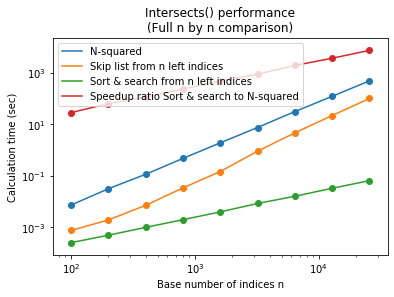

0 n,dt0~,dt2~,dt0/dt2   100     0.007605     0.000259    29.362934
1 n,dt0~,dt2~,dt0/dt2   200     0.030079     0.000494    60.888664
2 n,dt0~,dt2~,dt0/dt2   400     0.118657     0.000986   120.341785
3 n,dt0~,dt2~,dt0/dt2   800     0.473972     0.002011   235.689707
4 n,dt0~,dt2~,dt0/dt2  1600     1.332141     0.004808   277.067596
5 n,dt0~,dt2~,dt0/dt2  3200     2.936365     0.010246   286.586473
6 n,dt0~,dt2~,dt0/dt2  6400     6.139810     0.020324   302.096536
7 n,dt0~,dt2~,dt0/dt2 12800    12.537264     0.039931   313.973204
8 n,dt0~,dt2~,dt0/dt2 25600    25.321421     0.078270   323.513747


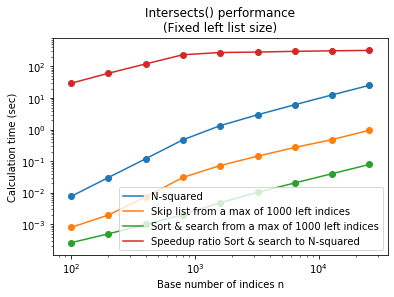

0 n,dt0~,dt2~,dt0/dt2   100     0.007655     0.000245    31.244898
1 n,dt0~,dt2~,dt0/dt2   200     0.030085     0.000497    60.533199
2 n,dt0~,dt2~,dt0/dt2   400     0.117268     0.000997   117.620863
3 n,dt0~,dt2~,dt0/dt2   800     0.476080     0.002006   237.328016
4 n,dt0~,dt2~,dt0/dt2  1600     1.098462     0.003033   362.170129
5 n,dt0~,dt2~,dt0/dt2  3200     1.973446     0.003664   538.604258
6 n,dt0~,dt2~,dt0/dt2  6400     3.695449     0.003758   983.355242
7 n,dt0~,dt2~,dt0/dt2 12800     7.106665     0.004289  1656.951504
8 n,dt0~,dt2~,dt0/dt2 25600    14.736512     0.005391  2733.539603


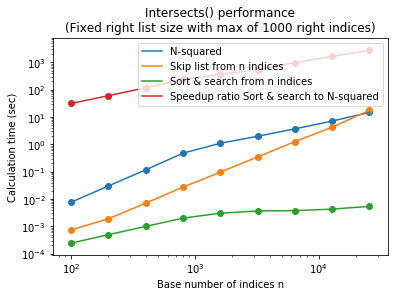

In [56]:
init = False
dt0_norm = 1.0
dt1_norm = 1.0
dt2_norm = 1.0
n_doublings = 9
x = numpy.zeros([n_doublings],dtype=numpy.double)
y0 = numpy.zeros([n_doublings],dtype=numpy.double)
y1 = numpy.zeros([n_doublings],dtype=numpy.double)
y2 = numpy.zeros([n_doublings],dtype=numpy.double)
m0_label = ''
m1_label = ''

timing_labels = ['N-squared','Skip list','Sort & search']

left_level  = 12
right_level = 14

# left_level  = 9
# right_level = 12

for test_case in range(3):
    for i in range(n_doublings):
        n = 100 * 2 ** i

    
        if test_case == 0:
            case_name='Full n by n comparison'
            m0 = n
            m0_label = 'from n left indices'
            m1 = n
            m1_label = 'n right indices'
        
        if test_case == 1:
            case_name='Fixed left list size'
            m0 = 1000
            m0_label = 'from a max of 1000 left indices'
            m1 = n
            m1_label = 'n right indices'
        
        if test_case == 2:
            case_name='Fixed right list size'
            m0 = n
            m0_label = 'from n indices'
            m1 = 1000
            m1_label = 'with max of 1000 right indices'
            case_name = case_name+' '+m1_label
            
        timings,ind0,ind1 = compare_timings(n,m0,m1,left_level,right_level)
        
        dt0 = timings['N-squared'].dt
        dt1 = timings['Skip list'].dt
        dt2 = timings['Sort & search'].dt
        
        dt0_o_dt1 = dt0/dt1
        dt0_o_dt2 = dt0/dt2
    
        if init:
            dt0_norm = dt0
            dt1_norm = dt1
            dt2_norm = dt2
            init = False

        # print('result0,result1 ',result0[0:10],result1[0:10])
        # print('delta max       ',delta_max)
        # print('n,dt0,dt1,dt0/dt1 ',n,dt0,dt1,dt0_o_dt1)
        print(i,'n,dt0~,dt2~,dt0/dt2 %5i %12f %12f %12f'%(n,dt0/dt0_norm,dt2/dt2_norm,dt0_o_dt2))
        x[i] = n
        y0[i] = dt0/dt0_norm
        y1[i] = dt1/dt1_norm
        y2[i] = dt2
        
        
    fig,ax = plt.subplots()
    plt.xscale('log')
    plt.yscale('log')
    # ax.plot(x,y0,label='N**2 loop')

    ax.plot(x,y0,label=timing_labels[0])
    ax.scatter(x,y0)
            
    ax.plot(x,y1,label=timing_labels[1]+' '+m0_label)
    ax.scatter(x,y1)
            
    ax.plot(x,y2,label=timing_labels[2]+' '+m0_label)
    ax.scatter(x,y2)
    
    # ax.plot(x,y0/y1,label='Ratio')
    # ax.scatter(x,y0/y1)
    
    ax.plot(x,y0/y2,label='Speedup ratio %s to %s'%(timing_labels[2],timing_labels[0]))
    ax.scatter(x,y0/y2)
    
    ax.legend()
    plt.title('Intersects() performance\n('+case_name+')')
    plt.xlabel('Base number of indices n')
    plt.ylabel('Calculation time (sec)')
    plt.show()

Test performed on a 2010 Mac Pro (5,1) 2x2.4GHz Quad-Core Xeon, with 64GB 1066MHz DDR3 RAM, MacOS 10.13.6.

In [51]:
for i in timings:
    print('%16s result[0:10] ='%(i),timings[i].result[0:10])
    

       Skip list result[0:10] = [1 0 1 0 1 0 1 0 1 0]
   Sort & search result[0:10] = [1 0 1 0 1 0 1 0 1 0]
       N-squared result[0:10] = [1 0 1 0 1 0 1 0 1 0]
